In [1]:
# import necesary dependencies

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")

In [4]:
stock_data = pd.read_csv("MRF.NS.csv")

In [5]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-30,73753.898438,74153.953125,73001.0,73218.796875,72702.710938,5919
1,2018-08-31,73250.000000,74300.000000,73000.0,74026.750000,73504.976563,4913
2,2018-09-03,73777.000000,74169.953125,73000.0,73038.898438,72524.093750,3917
3,2018-09-04,73300.000000,73600.000000,70850.0,71028.898438,70528.265625,8961
4,2018-09-05,71299.000000,71299.000000,70001.0,70352.296875,69856.421875,7748


In [6]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,73658.702014,74449.152616,72786.121062,73562.903379,73263.411755,13127.777958
std,13181.816497,13264.467305,13094.724412,13186.136554,13260.256190,15837.347341
min,50155.550781,53400.000000,49915.101563,51970.250000,51665.777344,0.000000
25%,62966.750000,63811.000000,62135.524414,62961.423828,62582.227539,5762.500000
50%,71534.000000,72368.324219,70553.851562,71329.601562,71023.191407,8690.000000
75%,83181.500000,83968.750000,82232.400391,83086.974610,82822.535156,14416.000000
max,111472.000000,111997.000000,108250.851563,111296.500000,111296.500000,281075.000000


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


In [8]:
stock_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
stock_data.duplicated().sum()

0

In [11]:
stock_data.shape

(1234, 7)

In [12]:
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-30,73753.898438,74153.953125,73001.0,73218.796875,72702.710938,5919
1,2018-08-31,73250.000000,74300.000000,73000.0,74026.750000,73504.976563,4913
2,2018-09-03,73777.000000,74169.953125,73000.0,73038.898438,72524.093750,3917
3,2018-09-04,73300.000000,73600.000000,70850.0,71028.898438,70528.265625,8961
4,2018-09-05,71299.000000,71299.000000,70001.0,70352.296875,69856.421875,7748


In [14]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [15]:
stock_data["Date"] =pd.to_datetime(stock_data["Date"]) # setting the Date column as datetime

In [17]:
stock_data = stock_data.set_index("Date")

In [18]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-30,73753.898438,74153.953125,73001.000000,73218.796875,72702.710938,5919
2018-08-31,73250.000000,74300.000000,73000.000000,74026.750000,73504.976563,4913
2018-09-03,73777.000000,74169.953125,73000.000000,73038.898438,72524.093750,3917
2018-09-04,73300.000000,73600.000000,70850.000000,71028.898438,70528.265625,8961
2018-09-05,71299.000000,71299.000000,70001.000000,70352.296875,69856.421875,7748
...,...,...,...,...,...,...
2023-08-23,108410.000000,109200.000000,108051.148438,108675.546875,108675.546875,4181
2023-08-24,109399.000000,109399.000000,108106.000000,108595.148438,108595.148438,4788
2023-08-25,108127.648438,108895.703125,108000.546875,108542.000000,108542.000000,3562


# Visualisation

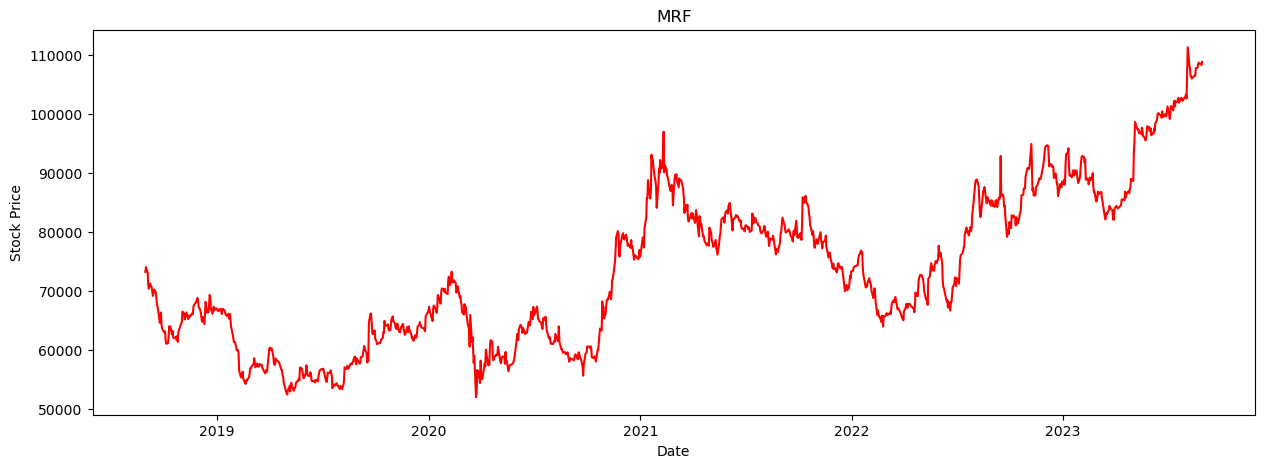

In [27]:
plt.figure(figsize =(15,5))
plt.plot(stock_data["Close"],color ="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("MRF")
plt.show()

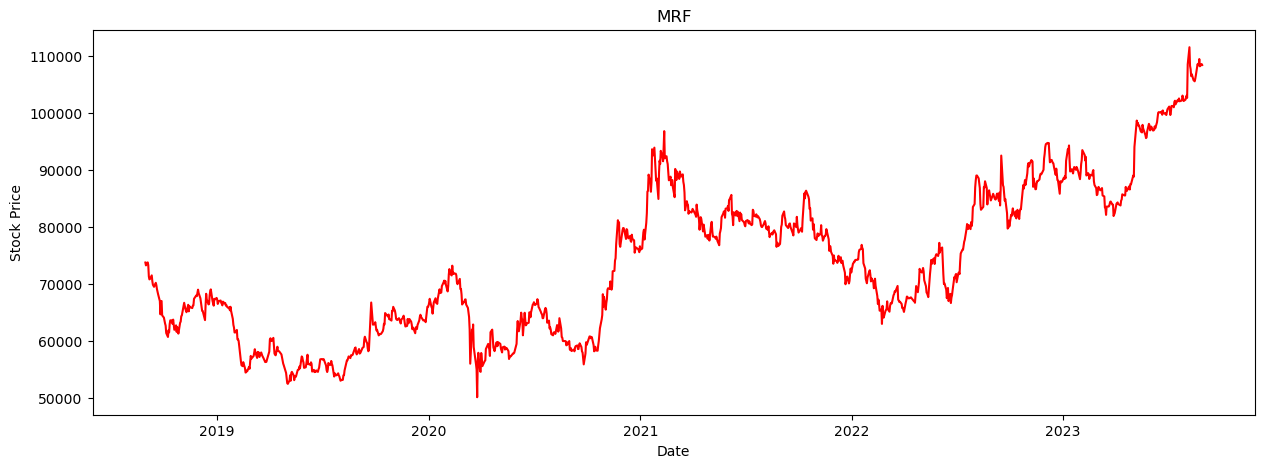

In [26]:
plt.figure(figsize =(15,5))
plt.plot(stock_data["Open"],color ="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("MRF")
plt.show()

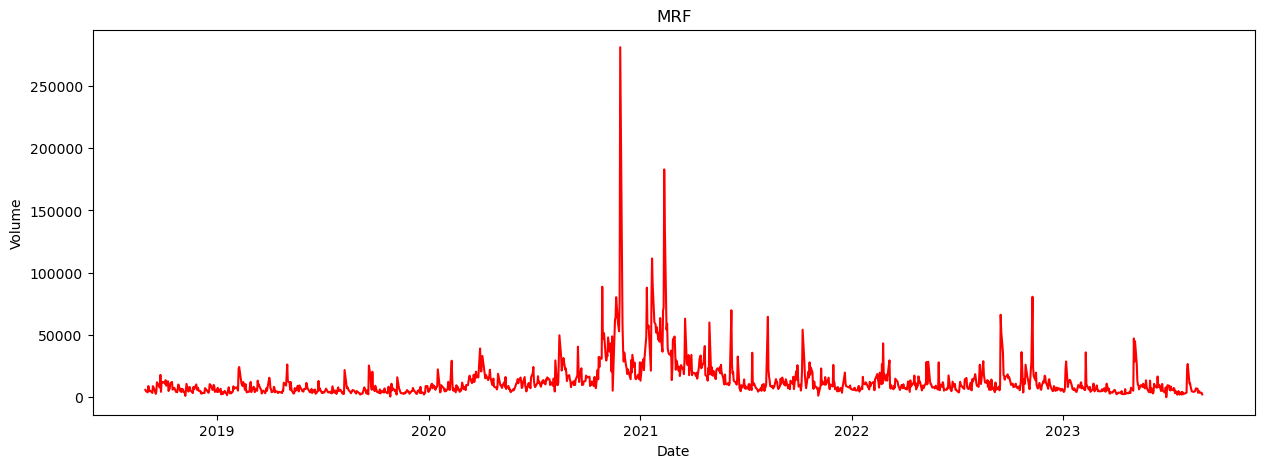

In [25]:
plt.figure(figsize =(15,5))
plt.plot(stock_data["Volume"],color ="red")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("MRF")
plt.show()

In [28]:
# histogram

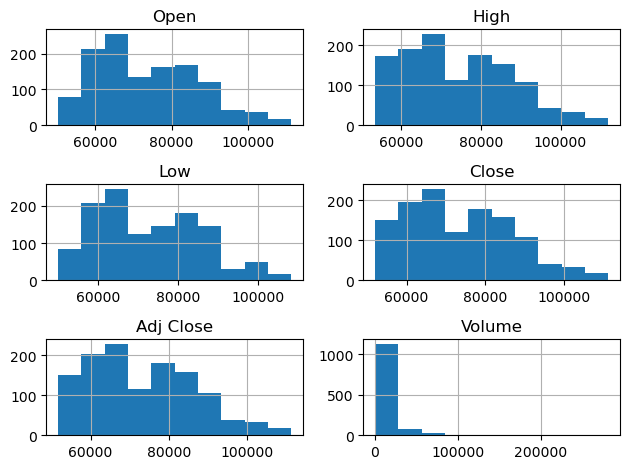

In [30]:
stock_data.hist()
plt.tight_layout()
plt.show()

In [31]:
# barchart

In [35]:
stock_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997588,0.998055,0.995802,0.995783,0.163869
High,0.997588,1.000000,0.996905,0.998345,0.998301,0.188814
Low,0.998055,0.996905,1.000000,0.997989,0.997991,0.144112
Close,0.995802,0.998345,0.997989,1.000000,0.999983,0.166664
Adj Close,0.995783,0.998301,0.997991,0.999983,1.000000,0.165333
Volume,0.163869,0.188814,0.144112,0.166664,0.165333,1.000000


In [36]:
stock_data["gain"] =stock_data["Close"].diff()

In [37]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,gain
Date,,,,,,,
2018-08-30,73753.898438,74153.953125,73001.000000,73218.796875,72702.710938,5919,NaN
2018-08-31,73250.000000,74300.000000,73000.000000,74026.750000,73504.976563,4913,807.953125
2018-09-03,73777.000000,74169.953125,73000.000000,73038.898438,72524.093750,3917,-987.851562
2018-09-04,73300.000000,73600.000000,70850.000000,71028.898438,70528.265625,8961,-2010.000000
2018-09-05,71299.000000,71299.000000,70001.000000,70352.296875,69856.421875,7748,-676.601563
...,...,...,...,...,...,...,...
2023-08-23,108410.000000,109200.000000,108051.148438,108675.546875,108675.546875,4181,263.750000
2023-08-24,109399.000000,109399.000000,108106.000000,108595.148438,108595.148438,4788,-80.398437
2023-08-25,108127.648438,108895.703125,108000.546875,108542.000000,108542.000000,3562,-53.148438


In [42]:
stock_data = stock_data.drop(index =stock_data.index[0])

In [43]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,gain
Date,,,,,,,
2018-08-31,73250.000000,74300.000000,73000.000000,74026.750000,73504.976563,4913,807.953125
2018-09-03,73777.000000,74169.953125,73000.000000,73038.898438,72524.093750,3917,-987.851562
2018-09-04,73300.000000,73600.000000,70850.000000,71028.898438,70528.265625,8961,-2010.000000
2018-09-05,71299.000000,71299.000000,70001.000000,70352.296875,69856.421875,7748,-676.601563
2018-09-06,70799.898438,70984.296875,70100.000000,70830.546875,70331.296875,4867,478.250000
...,...,...,...,...,...,...,...
2023-08-23,108410.000000,109200.000000,108051.148438,108675.546875,108675.546875,4181,263.750000
2023-08-24,109399.000000,109399.000000,108106.000000,108595.148438,108595.148438,4788,-80.398437
2023-08-25,108127.648438,108895.703125,108000.546875,108542.000000,108542.000000,3562,-53.148438


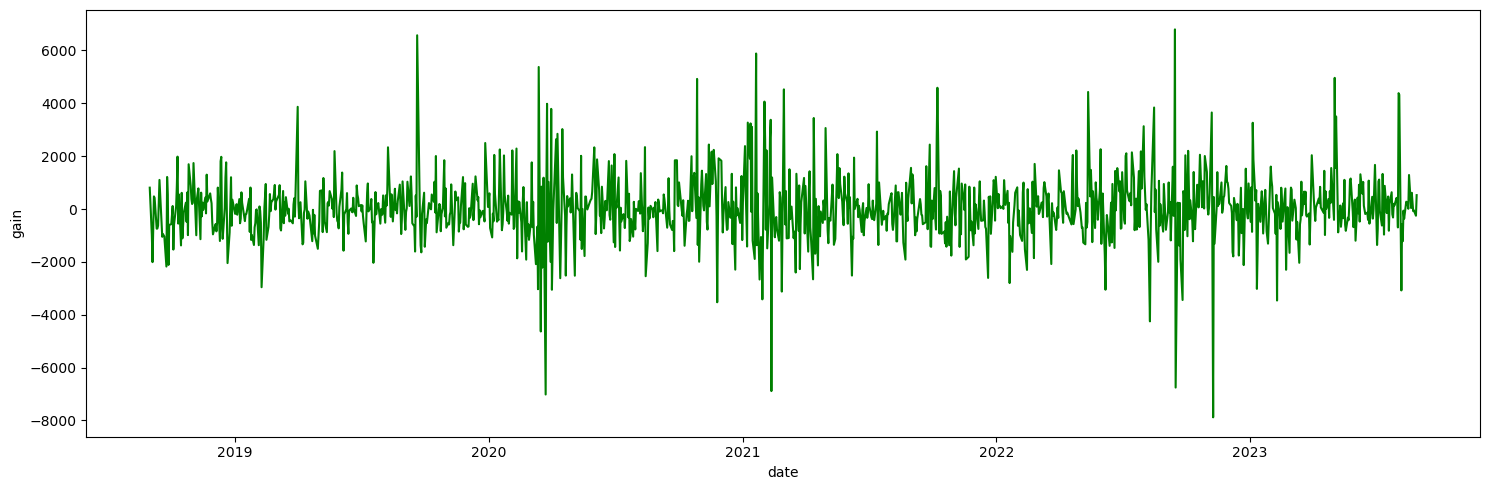

In [55]:
plt.figure(figsize =(15,5))
plt.plot(stock_data["gain"],color ="green")
plt.ylabel("gain")
plt.xlabel("date")
plt.tight_layout()
plt.show()

In [56]:
stock_data.corr()

,Open,High,Low,Close,Adj Close,Volume,gain
Open,1.000000,0.997588,0.998055,0.995802,0.995784,0.163886,-0.006654
High,0.997588,1.000000,0.996906,0.998345,0.998302,0.188822,0.041093
Low,0.998055,0.996906,1.000000,0.997990,0.997992,0.144131,0.034711
Close,0.995802,0.998345,0.997990,1.000000,0.999983,0.166669,0.077785
Adj Close,0.995784,0.998302,0.997992,0.999983,1.000000,0.165331,0.077549
Volume,0.163886,0.188822,0.144131,0.166669,0.165331,1.000000,0.075720
gain,-0.006654,0.041093,0.034711,0.077785,0.077549,0.075720,1.000000


In [57]:
x =stock_data.iloc[:,0:6]

In [59]:
y =stock_data["gain"]

In [61]:
x.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-31,73250.000000,74300.000000,73000.0,74026.750000,73504.976563,4913
2018-09-03,73777.000000,74169.953125,73000.0,73038.898438,72524.093750,3917
2018-09-04,73300.000000,73600.000000,70850.0,71028.898438,70528.265625,8961
2018-09-05,71299.000000,71299.000000,70001.0,70352.296875,69856.421875,7748
2018-09-06,70799.898438,70984.296875,70100.0,70830.546875,70331.296875,4867


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc = StandardScaler()

In [64]:
scaled_df = sc.fit_transform(x)

In [66]:
x = scaled_df

In [70]:
x = pd.DataFrame(x)

In [71]:
x

,0,1,2,3,4,5
0,-0.030999,-0.011263,0.016347,0.035156,0.018183,-0.519109
1,0.008980,-0.021067,0.016347,-0.039760,-0.055789,-0.582004
2,-0.027206,-0.064035,-0.147842,-0.192193,-0.206301,-0.263490
3,-0.179006,-0.237506,-0.212677,-0.243505,-0.256967,-0.340087
4,-0.216869,-0.261231,-0.205117,-0.207236,-0.221155,-0.522014
...,...,...,...,...,...,...
1228,2.636312,2.619827,2.693085,2.662825,2.670514,-0.565333
1229,2.711339,2.634830,2.697274,2.656728,2.664451,-0.527003
1230,2.614892,2.596887,2.689221,2.652697,2.660443,-0.604421
1231,2.644937,2.597252,2.683188,2.633435,2.641288,-0.603095


In [75]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test1 = train_test_split(x,y,test_size =0.2,random_state =2)

In [116]:
x_train.shape,y_train.shape

((986, 6), (986,))

# model building 

In [117]:
# Linear regression

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lr_model =LinearRegression()

In [120]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [202]:
lr_pred = lr_model.predict(list)

In [201]:
list = [[-0.030999,-0.011263,0.016347,0.035156,0.018183,-0.519109]]

In [203]:
lr_pred

array([935.88790848])

In [122]:
linear_reg = pd.DataFrame(lr_pred,columns =["prediction"])

In [123]:
stock_data = stock_data.join(linear_reg)

In [124]:
stock_data.drop(columns ="prediction",inplace =True)

In [98]:
stock_data.drop(columns =0,inplace =True)

In [99]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,gain
Date,,,,,,,
2018-08-31 00:00:00,73250.000000,74300.000000,73000.000000,74026.750000,73504.976563,4913,807.953125
2018-09-03 00:00:00,73777.000000,74169.953125,73000.000000,73038.898438,72524.093750,3917,-987.851562
2018-09-04 00:00:00,73300.000000,73600.000000,70850.000000,71028.898438,70528.265625,8961,-2010.000000
2018-09-05 00:00:00,71299.000000,71299.000000,70001.000000,70352.296875,69856.421875,7748,-676.601563
2018-09-06 00:00:00,70799.898438,70984.296875,70100.000000,70830.546875,70331.296875,4867,478.250000
...,...,...,...,...,...,...,...
2023-08-23 00:00:00,108410.000000,109200.000000,108051.148438,108675.546875,108675.546875,4181,263.750000
2023-08-24 00:00:00,109399.000000,109399.000000,108106.000000,108595.148438,108595.148438,4788,-80.398437
2023-08-25 00:00:00,108127.648438,108895.703125,108000.546875,108542.000000,108542.000000,3562,-53.148438


In [204]:
y_test1= pd.DataFrame(y_test,columns =["Actual_value"])

In [110]:
y_pred =pd.DataFrame(lr_pred.values,columns =["predicted"])

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [104]:
match_df = y_test.join(y_pred)

In [105]:
match_df

,Actual_value,predicted


In [106]:
y_test

,Actual_value


In [109]:
y_test

,Actual_value


In [111]:
lr_pred

array([ 9.82029790e+02, -5.80479190e+02, -9.53750919e+02,  2.11027844e+03,
       -8.79459486e+01,  3.31270437e+02, -2.61581240e+01, -8.62455876e+02,
        2.46243401e+02,  1.65658146e+02, -9.22989703e+02, -4.73910332e+02,
        4.07575658e+02,  8.30717062e+02,  3.72463121e+02,  1.82841518e+03,
       -8.84486112e+02, -7.12138034e+02,  7.16662302e+02,  1.30122645e+03,
        1.13397205e+03, -8.94890207e+02, -1.12323981e+02, -3.09311213e+02,
        2.26740157e+02,  9.71785709e+02, -7.36907406e+01,  3.33682128e+02,
        4.51965776e+03, -1.96075435e+02,  1.07757908e+03,  1.82754647e+03,
        1.23129838e+03, -1.51427729e+03, -9.56743313e+01,  7.27197136e+02,
       -5.74823116e+02,  2.75320549e+03, -5.24250225e+02,  1.00640582e+02,
       -1.67512573e+03, -9.41673397e+02,  4.15796340e+02,  1.49215101e+03,
       -3.01106334e+03,  7.80952550e+02,  1.52874812e+01, -1.00765408e+03,
        3.49427903e+02,  6.98662619e+02, -1.02512266e+03, -1.42839187e+03,
        2.00655183e+03, -

In [113]:
y_pred =pd.DataFrame(lr_pred,columns =["predicted"])

In [154]:
y_pred =y_pred.reset_index(drop =True)

In [155]:
y_pred

,predicted
0,982.029790
1,-580.479190
2,-953.750919
3,2110.278438
4,-87.945949
...,...
242,-539.595380
243,213.968200
244,148.805325
245,256.713111


In [144]:
actual_test = pd.DataFrame(y_test1)

In [153]:
actual_test =actual_test.reset_index(drop =True)


In [141]:
print(y_test1)  # Check the data in y_test1


Date
2021-07-01     938.796875
2022-04-19    -583.554687
2020-07-22   -1213.351563
2020-08-13    2341.750000
2019-11-07    -115.148437
                 ...     
2020-04-28    -130.851562
2020-06-18      31.449219
2020-02-14     274.054687
2023-03-20     658.156250
2020-10-16    -441.546875
Name: gain, Length: 247, dtype: float64


In [156]:
matched_df = actual_test.join(y_pred)

In [157]:
matched_df

,gain,predicted
0,938.796875,982.029790
1,-583.554687,-580.479190
2,-1213.351563,-953.750919
3,2341.750000,2110.278438
4,-115.148437,-87.945949
...,...,...
242,-130.851562,-539.595380
243,31.449219,213.968200
244,274.054687,148.805325
245,658.156250,256.713111


In [150]:
print(actual_test.index)



DatetimeIndex(['2021-07-01', '2022-04-19', '2020-07-22', '2020-08-13',
               '2019-11-07', '2021-06-23', '2022-04-28', '2020-03-16',
               '2021-05-24', '2023-08-10',
               ...
               '2019-10-17', '2021-09-13', '2020-11-25', '2020-01-01',
               '2022-12-14', '2020-04-28', '2020-06-18', '2020-02-14',
               '2023-03-20', '2020-10-16'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)
RangeIndex(start=0, stop=247, step=1)


In [151]:
print(y_pred.index)

RangeIndex(start=0, stop=247, step=1)


<Axes: xlabel='gain', ylabel='predicted'>

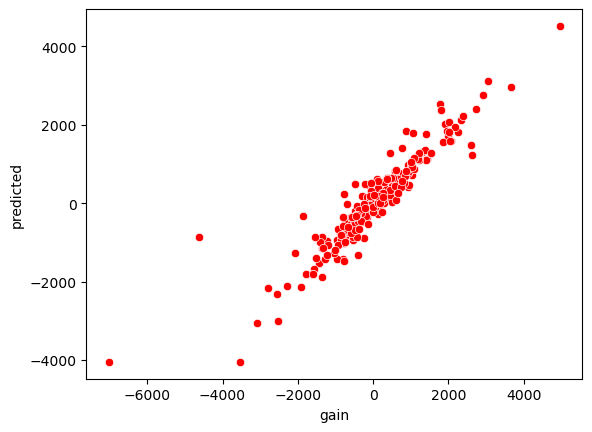

In [160]:
sns.scatterplot(data =matched_df,x ='gain',y ='predicted',color ="red")

In [161]:
from sklearn.metrics import r2_score


In [162]:
print(f"r2_score",r2_score(y_test1,lr_pred))

r2_score 0.8679855448290793


In [163]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'gain'], dtype='object')

In [164]:
from sklearn.linear_model import Ridge

In [167]:
r_model =Ridge(alpha =1.0)
r_model.fit(x_train,y_train)

Ridge()

In [168]:
r_pred = r_model.predict(x_test)

In [172]:
r_pred

array([ 7.67702449e+02, -3.80315098e+02, -8.32313566e+02,  1.81470209e+03,
       -1.23292003e+02,  1.91983676e+02, -1.16634507e+01, -6.30507280e+02,
        1.36941595e+02,  2.01206467e+02, -8.03014070e+02, -4.34782848e+02,
        3.27504094e+02,  6.69473295e+02,  3.20145894e+02,  1.62111995e+03,
       -6.82967474e+02, -6.05821537e+02,  6.15421309e+02,  1.18086569e+03,
        9.45659437e+02, -7.52181461e+02, -2.99372723e+01, -3.44174699e+02,
        1.10938566e+02,  8.38887056e+02, -5.69306688e+00,  2.82266385e+02,
        4.00297616e+03, -1.77351433e+02,  1.00094001e+03,  1.53118175e+03,
        1.02349296e+03, -1.25924356e+03, -1.00484865e+02,  5.11562510e+02,
       -4.06820649e+02,  2.30773308e+03, -5.47180703e+02,  1.01409135e+02,
       -1.38514650e+03, -7.19259057e+02,  2.90033569e+02,  1.19513782e+03,
       -2.44236099e+03,  6.96551197e+02,  5.58717672e+01, -7.79910496e+02,
        3.48081830e+02,  5.68588551e+02, -8.17988692e+02, -1.20260507e+03,
        1.66705786e+03, -

In [173]:
r2_score(y_test1,r_pred)

0.8296057209262567

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
model_random = RandomForestRegressor(n_estimators =100,random_state =42)

In [181]:
model_random.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [182]:
rf_pred = model_random.predict(x_test)

In [183]:
rf_pred

array([  542.06734373,  -193.5417188 ,  -438.25820304,  1194.86042974,
         -82.7223046 ,   -31.89929696,   -31.25679689,  -476.23394531,
          62.30832037,    69.0058593 ,  -389.39648445,  -143.94335948,
         126.61359374,   455.02132816,   144.0672269 ,   541.42351561,
       -1160.04285162,  -448.3047266 ,   344.48976546,   100.54320298,
         304.39953125,  -448.12863266,   -30.431875  ,  -282.69914062,
         211.5548438 ,   159.16585939,   494.0759375 ,    64.377578  ,
        1137.73976565,   372.38960939,   820.44937501,   162.26207021,
         709.15828121, -1053.68296899,   -18.23820294,   418.27199245,
         -59.74914065,  1418.41718753,  -258.62394527,   157.20585957,
        -697.99269515,  -606.98496098,    43.44046875,  -187.51078116,
        1425.64929687,   262.28078118,   -94.92511692,   -30.23617175,
         159.5575779 ,   269.9961718 ,  -789.45804702, -1658.71183604,
        1035.35835937,   406.90085939,   144.71789079,   341.4366016 ,
      

In [190]:
r2_score(y_test1,rf_pred)

0.3771429133688109

In [191]:
import pickle 


In [192]:
with open("model.pkl","wb") as file:
    pickle.dump(lr_model,file)

In [193]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'gain'], dtype='object')

In [197]:
x = stock_data["Close"]

In [199]:
y =stock_data["gain"]

In [200]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,gain
Date,,,,,,,
2018-08-31 00:00:00,73250.000000,74300.000000,73000.000000,74026.750000,73504.976563,4913,807.953125
2018-09-03 00:00:00,73777.000000,74169.953125,73000.000000,73038.898438,72524.093750,3917,-987.851562
2018-09-04 00:00:00,73300.000000,73600.000000,70850.000000,71028.898438,70528.265625,8961,-2010.000000
2018-09-05 00:00:00,71299.000000,71299.000000,70001.000000,70352.296875,69856.421875,7748,-676.601563
2018-09-06 00:00:00,70799.898438,70984.296875,70100.000000,70830.546875,70331.296875,4867,478.250000
...,...,...,...,...,...,...,...
2023-08-23 00:00:00,108410.000000,109200.000000,108051.148438,108675.546875,108675.546875,4181,263.750000
2023-08-24 00:00:00,109399.000000,109399.000000,108106.000000,108595.148438,108595.148438,4788,-80.398437
2023-08-25 00:00:00,108127.648438,108895.703125,108000.546875,108542.000000,108542.000000,3562,-53.148438


In [206]:
y_test1

,Actual_value


In [207]:
x_test

,0,1,2,3,4,5
696,0.488656,0.529117,0.558550,0.565375,0.559098,-0.248145
893,-0.504834,-0.501479,-0.533493,-0.546163,-0.538087,0.268336
460,-0.612103,-0.667904,-0.651419,-0.694323,-0.696327,0.080978
476,-0.892034,-0.761217,-0.869507,-0.727028,-0.728658,1.033933
286,-0.751310,-0.793661,-0.723642,-0.761450,-0.763114,-0.695732
...,...,...,...,...,...,...
401,-1.051344,-1.104409,-1.087151,-1.098691,-1.096079,-0.435755
436,-0.817082,-0.836776,-0.770150,-0.801105,-0.801890,-0.535528
355,-0.140999,-0.145516,-0.128750,-0.133775,-0.142404,-0.386248
1123,0.750835,0.696565,0.721619,0.758128,0.766095,-0.497008


In [208]:
import yfinance as yf
import pandas as pd

# Define the stock ticker (e.g., for Reliance Industries)
ticker = 'RELIANCE.NS'  # '.NS' is used for Indian stocks on Yahoo Finance

# Fetch the stock data using yfinance
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Save the stock data to an Excel file
stock_data.to_excel("SBC Exports.xlsx", engine='openpyxl')

print("Stock data saved to reliance_stock_data.xlsx")


[*********************100%***********************]  1 of 1 completed


Stock data saved to reliance_stock_data.xlsx


In [209]:
import yfinance as yf

# Define the stock ticker for Reliance Industries (for Indian stocks, use '.NS')
ticker = 'SBC Exports'  # '.NS' is used for Indian stocks listed on NSE

# Fetch the stock data for Reliance
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Save the data to a CSV file
stock_data.to_csv("sbc.csv")

print("Stock data saved to reliance_stock_data.csv")


[*********************100%***********************]  1 of 2 completed

1 Failed download:
['EXPORTS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 2 completed

Stock data saved to reliance_stock_data.csv
